In [1]:
import napari
import sys
Linux = True
if Linux:
    sys.path.insert(0,'/home/georgeos/Documents/GitHub/SYMPTOMM2')
else:
    sys.path.insert(0,'C:\\Users\\gh464\\Documents\\GitHub\\SYMPTOMM2\\')
from SYMPTOMM.cell import Cell
from SYMPTOMM.scene_functions import create_space, step_and_update
from SYMPTOMM.trench_geometry import trench_creator
from SYMPTOMM.phase_contrast_drawing import *
import tifffile
import numpy as np
from skimage.exposure import rescale_intensity
from skimage.transform import rescale, resize, downscale_local_mean
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from skimage.exposure import rescale_intensity
from ipywidgets import interactive
import os
from PIL import Image
import skimage
from tqdm.notebook import tqdm
import gc
from SYMPTOMM.PSF import get_phase_contrast_kernel, get_condensers

#viewer = napari.view_image(real_image)


In [3]:
def raster_cell_slow(length, width):
   #TODO: make this FASTER
    radius = int(width/2)
    cyl_height = int(length - 2*radius)
    shape = 500 #200
    cylinder = rg.cylinder(
            shape = shape,
            height = cyl_height,
            radius = radius,
            axis=0,
            position=(0.5,0.5,0.5),
            smoothing=False)##
    sphere1 = rg.sphere(shape,radius,((shape + cyl_height)/(2*shape),0.5,0.5))
    sphere2 = rg.sphere(shape,radius,((shape - cyl_height)/(2*shape),0.5,0.5))#

    cell = (cylinder + sphere1 + sphere2)
    cell = cell[int(shape/2-cyl_height/2-radius-1):int(shape/2+cyl_height/2+radius+1),
                int(shape/2)-radius:int(shape/2)+radius,
               int(shape/2)-radius:int(shape/2)+radius]
    z,x,y = cell.nonzero()
    OPL_cell = np.sum(cell,axis=2)
    return OPL_cell

def raster_cell(length, width):
    L = int(np.rint(length))
    W = int(np.rint(width))
    new_cell = np.zeros((L,W))
    R = (W-1)/2


    x_cyl = np.arange(0,2*R+1,1)
    I_cyl = np.sqrt(R**2 - (x_cyl-R)**2)
    L_cyl = L - W
    new_cell[int(W/2):-int(W/2),:] = I_cyl

    x_sphere = np.arange(0,int(W/2),1)
    sphere_Rs = np.sqrt((R)**2 - (x_sphere-R)**2)
    sphere_Rs = np.rint(sphere_Rs).astype(int)

    for c in range(len(sphere_Rs)):
        R_ = sphere_Rs[c]
        x_cyl = np.arange(0,R_,1)
        I_cyl = np.sqrt(R_**2 - (x_cyl-R_)**2)
        new_cell[c,int(W/2)-sphere_Rs[c]:int(W/2)+sphere_Rs[c]] = np.concatenate((I_cyl,I_cyl[::-1]))
        new_cell[L-c-1,int(W/2)-sphere_Rs[c]:int(W/2)+sphere_Rs[c]] = np.concatenate((I_cyl,I_cyl[::-1]))
    new_cell = new_cell.astype(int)
    return new_cell

In [11]:
print(round(4.5))
print(np.rint(4.5))
print(np.around(4.5))

4
4.0
4.0


4.0

In [6]:
%%time
cell = raster_cell_slow(200,50)

CPU times: user 611 ms, sys: 630 ms, total: 1.24 s
Wall time: 1.24 s


In [5]:
%%time
cell = raster_cell(200,50)

CPU times: user 2.88 ms, sys: 2.64 ms, total: 5.52 ms
Wall time: 3.3 ms


In [5]:
x_sphere = np.arange(0,int(W/2),1)
sphere_Rs = np.sqrt((R)**2 - (x_sphere-R)**2)
sphere_Rs = np.rint(sphere_dias).astype(int)
sphere_Rs

NameError: name 'sphere_dias' is not defined

In [135]:
len(np.concatenate((I_cyl,I_cyl[::-1])))

98

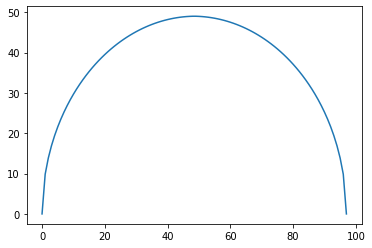

In [136]:
plt.plot(np.concatenate((I_cyl,I_cyl[::-1])))

In [10]:
np.rint(4.501)

5.0

In [83]:
R_ = sphere_Rs[c]
x_cyl = np.arange(0,R_,1)
I_cyl = np.sqrt(R_**2 - (x_cyl-R_)**2)

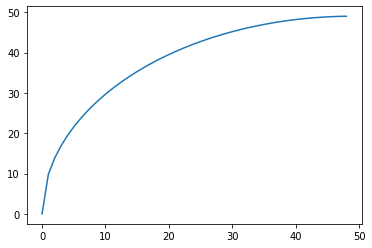

In [85]:
plt.plot(I_cyl)

In [53]:
sphere_Rs[4]

19

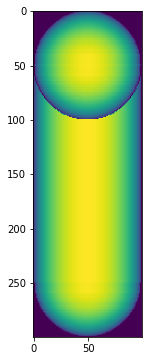

In [99]:
plt.figure(figsize=(6,6))
plt.imshow(new_cell)